In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV


<font  style="font-size: 4rem; color: #1abc9c"> SVM </font>

# <font color="#1E90FF">Exercise 1. Linear SVM - Influence of hyper-parameter C</font>

## <font color="#9400D3">1. Load, analyze and visualize data</font>

Warning: in this particular exercise, we will not split the dataset in train/val/test.

In [5]:
dataset = pd.read_csv('./data/LineaireNoisy.txt', delimiter='\t')
dataset

,x1,x2,y
0,9.50,10.00,0
1,14.25,16.55,1
2,10.00,5.00,1
3,2.30,5.25,0
4,3.40,3.88,0
...,...,...,...
147,15.01,15.67,1
148,16.05,14.70,1
149,15.65,18.23,1
150,18.85,17.43,1


<font color="red">**Question 1:**</font> 
- How many examples $\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(2)},...\boldsymbol{x}^{(n)}$ in the dataset?
- How many features $x_1, x_2,...x_d$ ? What are their types? Their distribution?
- What are the classes?
- What is the class distribution over the dataset?

In [6]:
dataset.describe()

,x1,x2,y
count,152.000000,152.000000,152.000000
mean,10.114276,9.982829,0.500000
std,5.421797,5.581715,0.501653
min,0.890000,1.080000,0.000000
25%,5.317500,4.742500,0.000000
50%,9.750000,9.250000,0.500000
75%,15.245000,15.280000,1.000000
max,19.380000,20.800000,1.000000


In [7]:
dataset.y.value_counts()

y
0    76
1    76
Name: count, dtype: int64

- 152 exemples
- 2 features, nombres flottants ( x1 entre 0.89 et 19.38 avec médiane à 9.75 ; x2 entre 1.08 et 20.8 avec médiane à 9.25 )
- 2 classes : 0 et 1
- répartion 76:76, donc répartit équitablement

### Plotting the dataset

<Axes: xlabel='x1', ylabel='x2'>

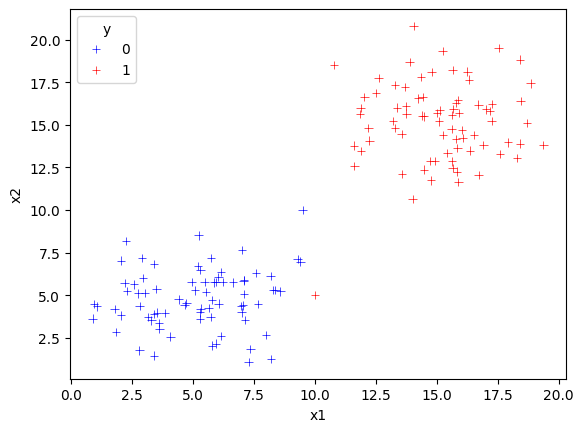

In [8]:
sns.scatterplot(data=dataset, x='x1', y='x2', hue='y', marker='+', palette=['blue','red'])


<font color="red">**Question 2:**</font>  Is this dataset linearly separable ? Find some examples that are close to the boundary

je dirais oui car en traçant une droite f(x) = -1/20 x + 20 on sépare plutot bien notre effectif

## <font color="#9400D3">2. Fitting a linear SVM to this dataset</font>

One implementation of SVM is done by class <code>SVC</code>, which stands for Support Vector Classification.
Documentation is available: 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [9]:
# SVC with linear kernel, and parameter C set to 1000
model_svm = svm.SVC(C = 1000, kernel = 'linear')

# Fit the model using the features (x1 and x2) and the target (y)
model_svm.fit(dataset.iloc[:,0:2], dataset.y)

SVC(C=1000, kernel='linear')

### Visualizing the SVM model

Run the following cells to see a plot of your dataset together with the decision boundary and the margins.

In [10]:
def svm_draw(model_svm, xmin, xmax, dataset):
    
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))


    plt.figure(figsize=(10, 8))
    # Plotting our two-features-space
    plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1], c = dataset.y, cmap = color_map, marker='+')
    # Constructing a hyperplane using a formula.
    w = model_svm.coef_[0]           # w consists of 2 elements
    b = model_svm.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(xmin, xmax)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points

    plt.plot(x_points, y_points, c='g');

    plt.scatter(model_svm.support_vectors_[:, 0],
                model_svm.support_vectors_[:, 1], 
                s=50, 
                facecolors='none', 
                edgecolors='k', 
                alpha=1);

    # Step 2 (unit-vector):
    w_hat = model_svm.coef_[0] / (np.sqrt(np.sum(model_svm.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(model_svm.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
             points_of_line_above[:, 1], 
             'g--', 
             linewidth=2)
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
             points_of_line_below[:, 1], 
             'g--',
             linewidth=2)

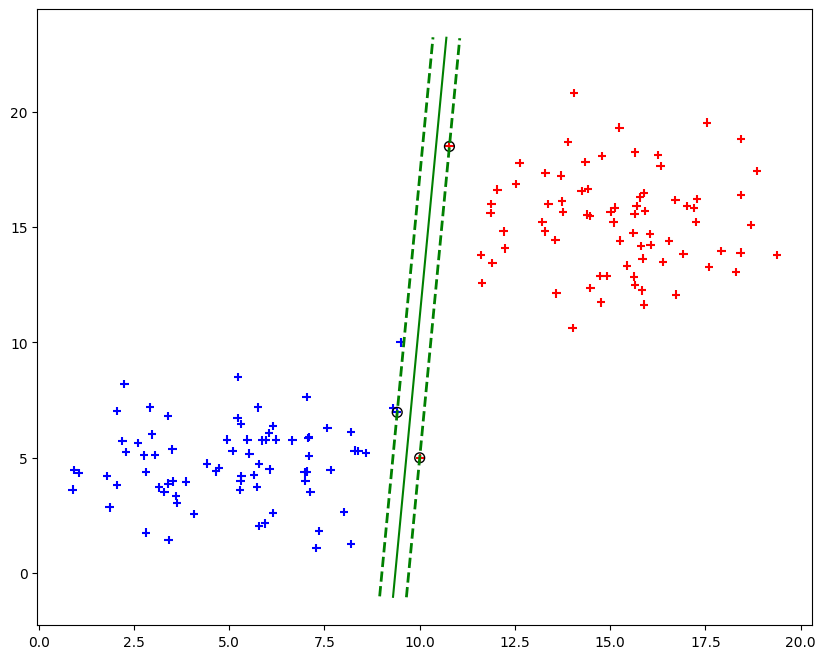

In [11]:
svm_draw(model_svm, 9.3, 10.7, dataset)

<font color="red">**Question 3:**</font>  
- What do you think of this boundary and these margins?
- How many points are inside the margins?
- How many points are misclassified by this model?

- Je trouve les bordures assez faible, dans le sens la séparation entre les deux ensembles n'est pas très explicit
- 3 points dans les marges
- aucun ne sont misclassified

### SVM model analysis

We can also retrieve more precise information about the model that will allow us to understand its decision process.

Course reminder: when fitting a SVM model, a Lagrange coefficient is associated to each sample. In addition, one more parameter is also estimated: the constant of the model.

We can find these informations by the following commands:

In [12]:
model_svm.support_vectors_
# the support vectors found by the SVC

array([[ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [13]:
model_svm.support_
# the index of the support vectors in the dataset

array([ 62,   2, 102], dtype=int32)

In [14]:
for i in model_svm.support_:
    print(dataset.iloc[i])

x1    9.41
x2    6.97
y     0.00
Name: 62, dtype: float64
x1    10.0
x2     5.0
y      1.0
Name: 2, dtype: float64
x1    10.78
x2    18.49
y      1.00
Name: 102, dtype: float64


In [15]:
model_svm.dual_coef_
# the lagrange coefficients associated to the support vectors (alpha_i) multiplied by their targets (y_i)

array([[-4.04838982,  3.46935572,  0.5790341 ]])

In [16]:
model_svm.intercept_
# the constant of the model (w0)

array([-26.58177221])

In [17]:
w = model_svm.dual_coef_.dot( model_svm.support_vectors_ )
w0 = model_svm.intercept_
[ w.dot(x) + w0 for x in model_svm.support_vectors_ ]

[array([-0.99970304]), array([0.99940407]), array([1.00026691])]

<font color="red">**Question 4:**</font>  
- How many support vectors?
- What are the classes $y_i$ associated to each support vector?
- What are lagrange coefficients $\alpha_i$ associated to each support vector?

Be carefull: 'dual_coef_' returns the lagrange coefficients associated to the support vectors **multiplied by their targets** 

- 3 vecteurs de support
- le premier vecteur est de classe 0, le deuxième et le troisième de classe 1
- $ y(i) $ est défini en fonction du signe de $ h(x) = w \cdot x + w_0 $

on sait que $ w = \sum \alpha_i y(i) x(i) $

donc on retrouve au final que 

$ y(1) = -1 $ et $ x(1) = 4.0 $

$ y(2) = +1 $ et $ x(2) = 3.5 $

$ y(3) = +1 $ et $ x(3) = 0.6 $

<font color="red">**Question 5:**</font> 
Deduce the equation $h_w(x)$ of this model. 

In [18]:
print(f'h(x) = {w} * x + {w0}')

h(x) = [[ 2.84019659 -0.16415793]] * x + [-26.58177221]


### Classification with SVM model

<font color="blue">**todo:**</font> Apply the previous formula to compute the decisions $\hat{y}$ for the 2 first examples of the dataset. 

Hints: dot product between 2 vectors $x_1$ and $x_2$ is done by <code>np.dot(x_1, x_2)</code>.

<font color="red">**Question 6:**</font> 
- What represents the value $h_w(x)$?
- Are these examples correctly classified?

In [19]:
w.dot(dataset.iloc[0:2,0:2].T) + w0

array([[-1.24148389, 11.17421548]])

You can obtain the $h_w(x)$ values for the examples in the dataset using the function 
<code>decision_function</code>.

Check your results.

In [20]:
print(model_svm.decision_function(dataset.iloc[:2,0:2]))
print('\n',dataset.iloc[:2,:])

[-1.24148389 11.17421548]

       x1     x2  y
0   9.50  10.00  0
1  14.25  16.55  1


Quand on est négatif, on est classé dans l'ensemble 0
Quand on est positif, on est classé dans l'ensemble 1

les résultats semblent cohérants

<font color="red">**Question 6:**</font> what are the decision values for the support vectors? Which values are expected for support vectors? 

In [21]:
w.dot(model_svm.support_vectors_.T) + w0

array([[-0.99970304,  0.99940407,  1.00026691]])

In [22]:
# TODO: print the decision values for the support vectors
print(model_svm.decision_function(model_svm.support_vectors_))

[-0.99970304  0.99940407  1.00026691]


/Users/tomchauvel/Documents/GitHub/2024-2025-ESIR-AA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## <font color="#9400D3">3. Change the hyperparameter C</font>

Even if the dataset is linearly separable, the previous boundary is not very adapted. Because C is very high the model favours no training error. 

<font color="blue">**Todo:**</font> 
- Fit a model with a smaller value of C: C = 1
- Plot the new boundary and margins

<font color="red">**Question 7:**</font> 
 - How many support vectors are selected ?
 - How many points are inside the margins ? on the margins ?
 - How many points from the dataset are misclassified ?
 - What are the lagrange values of $\alpha$ for the support vectors ?
 - What are the values of $h_w(x)$ for the support vectors ?


In [23]:
# TODO - Fit a SVM model with C=1 

# SVC with linear kernel, and parameter C set to 1
model_svm = svm.SVC(C = 1, kernel = 'linear')

# Fit the model using the features (x1 and x2) and the target (y)
model_svm.fit(dataset.iloc[:,0:2], dataset.y)

SVC(C=1, kernel='linear')

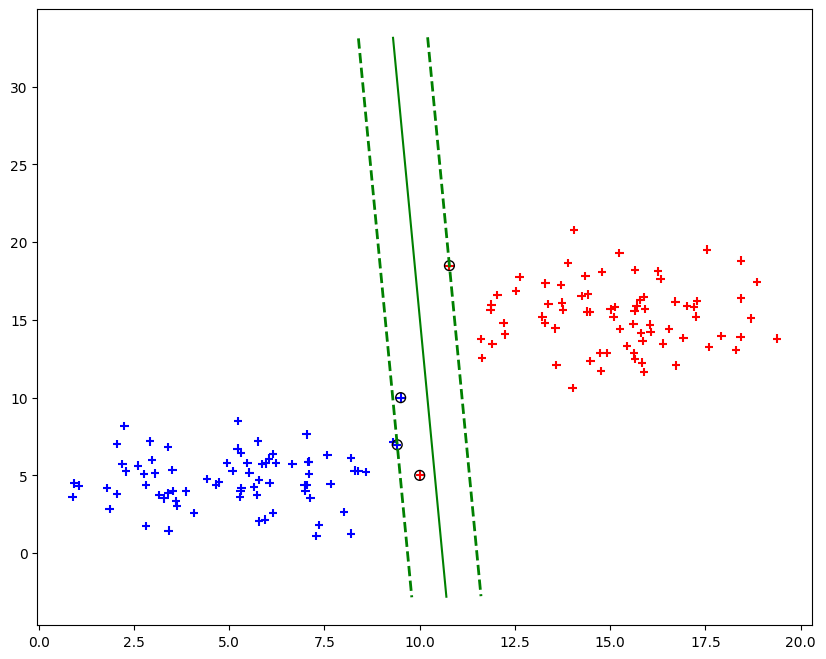

In [24]:
# TODO - Visualize boundary and margins

svm_draw(model_svm, 9.3, 10.7, dataset)

- 4 vecteurs
- 2 points à l'intérieur, 2 sur les marges
- 1 point mal classifié

In [25]:
model_svm.support_vectors_


array([[ 9.5 , 10.  ],
       [ 9.41,  6.97],
       [10.  ,  5.  ],
       [10.78, 18.49]])

In [26]:
print(model_svm.decision_function(model_svm.support_vectors_))

[-0.77124977 -0.99999406 -0.43553644  0.9999945 ]


/Users/tomchauvel/Documents/GitHub/2024-2025-ESIR-AA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [27]:
hws = model_svm.decision_function(model_svm.support_vectors_)
model_svm.dual_coef_

/Users/tomchauvel/Documents/GitHub/2024-2025-ESIR-AA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[-1.        , -0.43774553,  1.        ,  0.43774553]])

In [28]:
for i in range(4):
    hwi = hws[i]
    yi = 1 if hws[i] >= 0 else -1 
    print(f'- i = {i}')
    print(f'    - hw(x_{i}) = {hwi}')
    print(f'    - y(x_{i}) = {yi}')
    print(f'    - a(x_{i}) = {yi*model_svm.dual_coef_[0][i]}')

- i = 0
    - hw(x_0) = -0.7712497694552205
    - y(x_0) = -1
    - a(x_0) = 1.0
- i = 1
    - hw(x_1) = -0.9999940580628035
    - y(x_1) = -1
    - a(x_1) = 0.4377455269394003
- i = 2
    - hw(x_2) = -0.4355364352111959
    - y(x_2) = -1
    - a(x_2) = -1.0
- i = 3
    - hw(x_3) = 0.9999944997885049
    - y(x_3) = 1
    - a(x_3) = 0.4377455269394006


<font color="red">**Question 8:**</font>  Same questions for C = 0.01.

hint: you'll have to modify xmin and xmax in the <code>svm_draw</code> function to 3 and 17

In [29]:
# TODO - Fit a SVM with C=0.01

# SVC with linear kernel, and parameter C set to 1
model_svm = svm.SVC(C = 0.01, kernel = 'linear')

# Fit the model using the features (x1 and x2) and the target (y)
model_svm.fit(dataset.iloc[:,0:2], dataset.y)

SVC(C=0.01, kernel='linear')

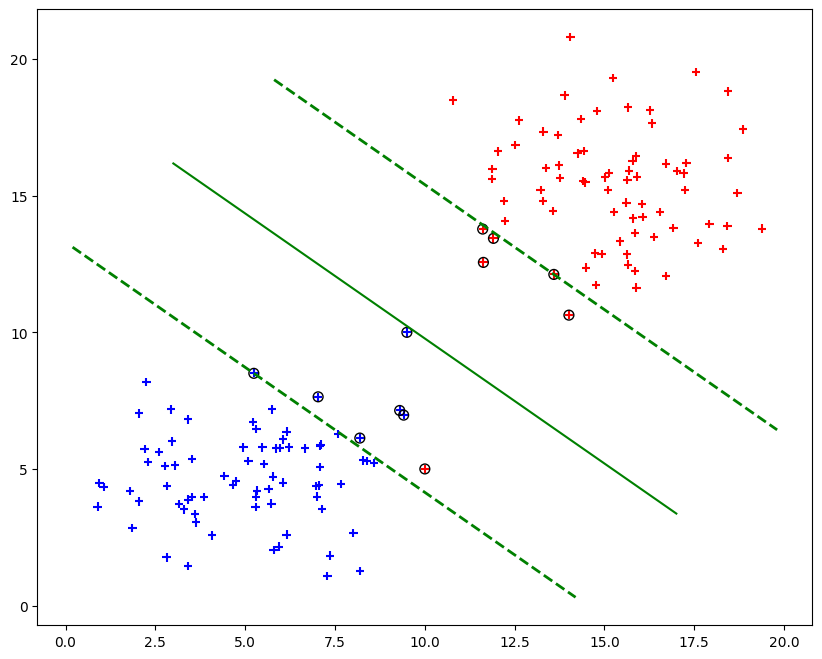

In [30]:
# TODO - Visualize boundary and margins

svm_draw(model_svm, 3, 17, dataset)

- 12 vecteurs
- 10 points à l'intérieur, 2 sur les marges
- 1 point mal classifié

In [31]:
model_svm.support_vectors_


array([[ 9.5 , 10.  ],
       [ 5.24,  8.5 ],
       [ 8.19,  6.13],
       [ 9.3 ,  7.14],
       [ 9.41,  6.97],
       [ 7.03,  7.64],
       [10.  ,  5.  ],
       [11.61, 13.78],
       [14.01, 10.63],
       [11.91, 13.44],
       [11.63, 12.56],
       [13.59, 12.12]])

In [32]:
hws = model_svm.decision_function(model_svm.support_vectors_)
model_svm.dual_coef_

/Users/tomchauvel/Documents/GitHub/2024-2025-ESIR-AA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[-0.01      , -0.00062732, -0.01      , -0.01      , -0.01      ,
        -0.01      ,  0.01      ,  0.01      ,  0.01      ,  0.01      ,
         0.01      ,  0.00062732]])

In [33]:
for i in range(12):
    hwi = hws[i]
    yi = 1 if hws[i] >= 0 else -1 
    print(f'- i = {i}')
    print(f'    - hw(x_{i}) = {hwi}')
    print(f'    - y(x_{i}) = {yi}')
    print(f'    - a(x_{i}) = {yi*model_svm.dual_coef_[0][i]}')

- i = 0
    - hw(x_0) = -0.04123122213147301
    - y(x_0) = -1
    - a(x_0) = 0.01
- i = 1
    - hw(x_1) = -1.0000001334355244
    - y(x_1) = -1
    - a(x_1) = 0.000627323999513436
- i = 2
    - hw(x_2) = -0.9413556385389339
    - y(x_2) = -1
    - a(x_2) = 0.01
- i = 3
    - hw(x_3) = -0.5815916640424232
    - y(x_3) = -1
    - a(x_3) = 0.01
- i = 4
    - hw(x_4) = -0.59389952213817
    - y(x_4) = -1
    - a(x_4) = 0.01
- i = 5
    - hw(x_5) = -0.8617678203520809
    - y(x_5) = -1
    - a(x_5) = 0.01
- i = 6
    - hw(x_6) = -0.8478167088246971
    - y(x_6) = -1
    - a(x_6) = -0.01
- i = 7
    - hw(x_7) = 0.9729423364336953
    - y(x_7) = 1
    - a(x_7) = 0.01
- i = 8
    - hw(x_8) = 0.8036855338174926
    - y(x_8) = 1
    - a(x_8) = 0.01
- i = 9
    - hw(x_9) = 0.9613296726738763
    - y(x_9) = 1
    - a(x_9) = 0.01
- i = 10
    - hw(x_10) = 0.759556585830166
    - y(x_10) = 1
    - a(x_10) = 0.01
- i = 11
    - hw(x_11) = 1.0000001687397764
    - y(x_11) = 1
    - a(x_11) = 0.000627

<font color="red">**Question 9:**</font>  what can you conclude about the influence of C ?

Plus C est petit, plus il va essayer de généraliser en augmentant les marges. A l'inverse, plus C est grand, plus il va surraprendre pour séparer parfaitement l'effectif en deux, quitte à avoir des marges plus faible

# <font color="#1E90FF">Exercise 2: Choosing C using train/val/test split</font>


In this exercise, you will choose the best value of C (for a given dataset) by the same procedure as for the other algorithms: train/validation/test split

In [34]:
# Load the dataset
dataset = pd.read_csv("./data/spam7.csv", decimal=",", index_col=0, delimiter = ";")
dataset
# A description about this dataset is given here:
# https://rdrr.io/cran/DAAG/man/spam7.html

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y
...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,n
4597,14,0.000,0.353,0.00,0.00,0.00,n
4598,118,0.000,0.000,0.00,0.00,0.30,n
4599,78,0.000,0.000,0.00,0.00,0.96,n


<font color="red">**Question 1:**</font>  How many examples ? How many features ? What is the distribution of the target ?

In [35]:
# TODO - dataset analysis
dataset.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


In [36]:
dataset.yesno.value_counts()

yesno
n    2788
y    1813
Name: count, dtype: int64

- 4601 éléments
- 6 features
- 2 classes : y ou n répartit avec 2788 non et 1813 oui

SVM can be very long to fit when the dataset is big (number of examples, number of features).
It is better to scale the features before fitting a model. A classical scaling is the standard scaler, which removes the mean and divide by the standard deviation. Hence, after this operation, each feature has a mean of zero and a standard deviation of 1. 

In [37]:
from sklearn.preprocessing import StandardScaler
# First, get the features
X = dataset.iloc[:,0:6]
# then create a scaler on X
scaler = StandardScaler().fit(X)
# Apply it to X
X = scaler.transform(X)
# create a dataframe with X
X = pd.DataFrame(X, columns=dataset.columns[0:6])
X.describe()

# You should see that the features have been transformed
# print(X.dollar.mean())
# the mean of feature 'dollar' is now 0 (very close to 0)
# it is the same for the other features

,crl.tot,dollar,bang,money,n000,make
count,4.601000e+03,4.601000e+03,4601.000000,4.601000e+03,4601.000000,4.601000e+03
mean,2.470916e-17,-2.470916e-17,0.000000,-2.470916e-17,0.000000,1.853187e-17
std,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109,1.000109e+00
min,-4.656073e-01,-3.083549e-01,-0.329912,-2.129944e-01,-0.290209,-3.424337e-01
25%,-4.095278e-01,-3.083549e-01,-0.329912,-2.129944e-01,-0.290209,-3.424337e-01
50%,-3.105639e-01,-3.083549e-01,-0.329912,-2.129944e-01,-0.290209,-3.424337e-01
75%,-2.851691e-02,-9.684841e-02,0.056314,-2.129944e-01,-0.290209,-3.424337e-01
max,2.566085e+01,2.410845e+01,39.491909,2.803001e+01,15.270178,1.452700e+01


In [38]:
# Now we will add the target variable inside X
X['yesno'] = dataset.yesno
X
# now our dataset is called X

,crl.tot,dollar,bang,money,n000,make,yesno
0,-0.008724,-0.308355,0.624007,-0.212994,-0.290209,-0.342434,y
1,1.228324,0.423783,0.126203,0.758565,0.937491,0.345359,y
2,3.258733,0.440053,0.008496,-0.077428,3.021726,-0.145921,y
3,-0.152222,-0.308355,-0.161934,-0.212994,-0.290209,-0.342434,y
4,-0.152222,-0.308355,-0.164387,-0.212994,-0.290209,-0.342434,y
...,...,...,...,...,...,...,...
4596,-0.322110,-0.308355,-0.329912,-0.212994,-0.290209,0.672880,n
4597,-0.444165,-0.308355,0.102907,-0.212994,-0.290209,-0.342434,n
4598,-0.272628,-0.308355,-0.329912,-0.212994,-0.290209,0.640128,n
4599,-0.338604,-0.308355,-0.329912,-0.212994,-0.290209,2.801763,n


<font color="blue">todo:</font>  Split this dataset into training/validation/test 

In [66]:
# TODO - train/validation/test splitting

datatrain,datatest = train_test_split(X,train_size=0.3,random_state=1)
datavalid,datatest = train_test_split(datatest,train_size=0.5,random_state=1)


<font color="red">**Question 2:**</font> 
 - Fit a first linear SVM model with C = 1
 - How many support vectors are selected ?
 - What is the performance of this model on the training set ? on the test set ?
 - What is the confusion matrix of the predictions of the test set ? What kind of errors is more often made? (check <code>confusion_matrix</code> function for that)

In [70]:
# TODO - Fit a linear SVM model with C = 1

model_svm = svm.SVC(C = 1, kernel = 'linear')

# Fit the model using the features (x1 and x2) and the target (y)
model_svm.fit(datatrain.iloc[:,0:6], datatrain.yesno)

SVC(C=1, kernel='linear')

In [71]:
print( "nombres de vecteurs :", len(model_svm.support_vectors_) )

nombres de vecteurs : 605


In [81]:
print( model_svm.score(datatrain.iloc[:,0:6], datatrain.yesno) )

0.8115942028985508


In [82]:
print( model_svm.score(datatest.iloc[:,0:6], datatest.yesno) )

0.8069522036002483


Text(113.9222222222222, 0.5, 'valeurs réelles')

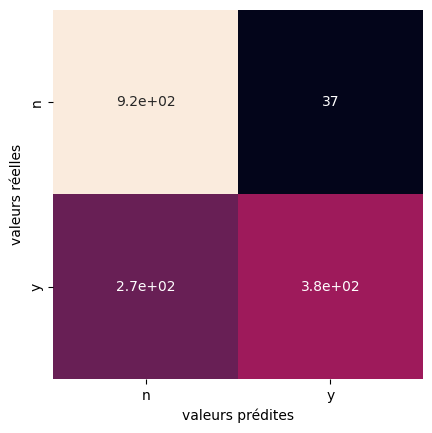

In [80]:
pred_test = model_svm.predict(datatest.iloc[:,0:6])
conf = confusion_matrix(datatest.yesno, pred_test)
sns.heatmap(conf, square=True, annot=True, cbar=False, xticklabels=np.unique(datatest.yesno), yticklabels=np.unique(datatest.yesno))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')

il se trompe sur les faux négatifs

<font color="blue">**Todo:**</font>  
- Try different values of C (between 0.01 and 1000 for instance, by order of magnitude) and compute the training and validation scores for each value of C (use a'for' loop). 
- Select the best value of C and estimate the generalization error of the selected SVM.

In [102]:
for i in np.geomspace(0.01,1000,6):
    model_svm = svm.SVC(C = i, kernel = 'linear')
    model_svm.fit(datatrain.iloc[:,0:6], datatrain.yesno)

    s1 = model_svm.score(datatrain.iloc[:,0:6], datatrain.yesno)
    s2 = model_svm.score(datavalid.iloc[:,0:6], datavalid.yesno)

    print(i,s1,s2)

0.01 0.7905797101449276 0.7850931677018633
0.1 0.8123188405797102 0.8192546583850931
1.0 0.8115942028985508 0.8136645962732919
10.0 0.813768115942029 0.815527950310559
100.0 0.813768115942029 0.815527950310559
1000.0 0.813768115942029 0.815527950310559


In [103]:
# TODO - estimate the generalization error of the selected SVM
model_svm = svm.SVC(C = 0.1, kernel = 'linear')
model_svm.fit(datatrain.iloc[:,0:6], datatrain.yesno)
print( model_svm.score(datatest.iloc[:,0:6], datatest.yesno) )

0.8075729360645562


<font color="red">**Question 3:**</font> 
- give the best C value
- compare the generalization error using this tuned value and the default value (C=1)

J'ai pris C=0.1

au lieu d'avoir une accuracy de 0.80695 on a 0.80757

un peu mieux, mais pas top

# <font color="#1E90FF">Exercise 3: Non-linear SVM</font>

We move here on SVM using kernel functions.

## <font color="#9400D3">1. Data analysis</font>

In [104]:
# Load a dataset
dataset = pd.read_csv("./data/SepNonLineaire.csv")
dataset

,x1,x2,y
0,1.5,4.0,1
1,1.0,2.0,1
2,0.0,0.0,1
3,1.0,4.0,1
4,0.5,3.0,1
...,...,...,...
145,-2.8,-3.3,0
146,-2.8,1.0,0
147,-2.8,3.0,0
148,-2.4,3.0,0


<font color="red">**Question 1:**</font> How many examples? features? distribution of the target values ?

In [44]:
print(dataset.y.value_counts())
dataset.describe()

y
0    105
1     45
Name: count, dtype: int64


,x1,x2,y
count,150.000000,150.000000,150.000000
mean,0.552000,0.870667,0.300000
std,1.923738,3.842845,0.459793
min,-2.800000,-5.000000,0.000000
25%,-1.000000,-3.000000,0.000000
50%,0.600000,1.000000,0.000000
75%,2.375000,4.000000,1.000000
max,4.000000,8.200000,1.000000


150 exemples, répartit avec 105 0 et 45 1

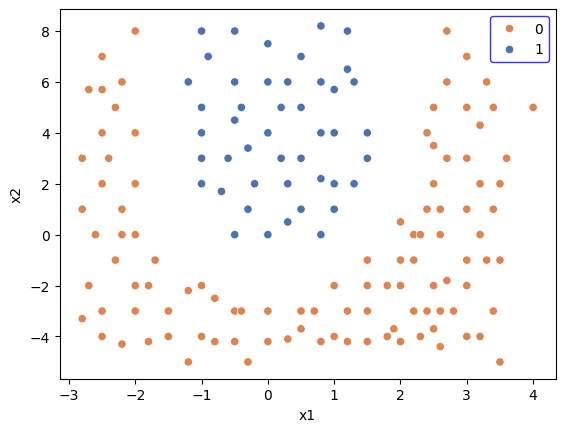

In [105]:
sns.scatterplot(data=dataset, x='x1', y='x2', hue='y', palette=sns.color_palette("deep")[0:2][::-1])
legend = plt.legend(frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('b')

<font color="red">**Question 2:**</font> Is this dataset linearly separable ?

pas du tout


In [107]:
# TODO - Split this dataset into training/validation/test

datatrain,datatest = train_test_split(dataset,train_size=0.3,random_state=1)
datavalid,datatest = train_test_split(datatest,train_size=0.5,random_state=1)

## <font color="#9400D3">2. Linear SVM</font>

<font color="blue">**Todo:**</font> try a linear SVM, compute the real error, and draw the boundaries, just to see.

In [117]:
# TODO - linear SVM

model_svm = svm.SVC(C = 1, kernel = 'linear')
model_svm.fit(datatrain.iloc[:,0:2], datatrain.y)
print( model_svm.score(datatrain.iloc[:,0:2], datatrain.y) )
print( model_svm.score(datavalid.iloc[:,0:2], datavalid.y) )

0.7777777777777778
0.7884615384615384


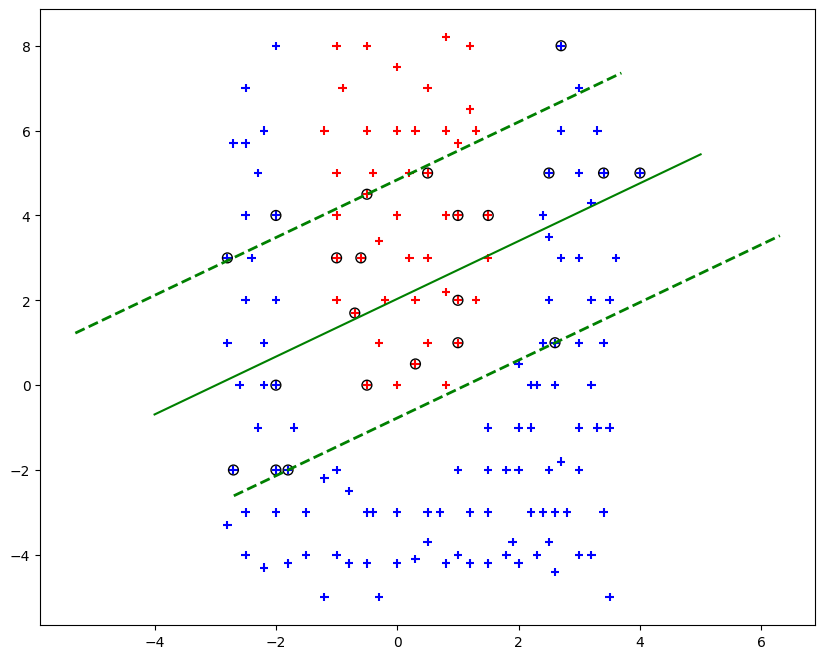

In [112]:
# TODO - draw the boundaries

svm_draw(model_svm, -4, 5, dataset)

## <font color="#9400D3">3. Radial SVM</font>

We will apply a radial SVM (with rbf kernel).
For this, you just need to specify <code>kernel = 'rbf'</code> rather than <code>kernel = 'linear'</code>.
And you'll also need to set a value for gamma (otherwise there is a default value)

<font color="blue">**Todo:**</font> 
 - Fit a rbf SVM with C = 1 and gamma = 10
 - Compute train and validation scores
 - Plot the decision boundaries and the margins using the function <code>draw_boundary</code> above
 
<font color="red">**Question 3:**</font> 
What phenomenon can you observe here ?

In [121]:
# TODO - Fit a radial SVM

model_svm = svm.SVC(C = 1, kernel = 'rbf', gamma=10)
model_svm.fit(datatrain.iloc[:,0:2], datatrain.y)
print( model_svm.score(datatrain.iloc[:,0:2], datatrain.y) )
print( model_svm.score(datavalid.iloc[:,0:2], datavalid.y) )

1.0
0.7307692307692307


In [122]:
def draw_boundary(model, data, x_min, x_max, y_min, y_max):
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)
    

/Users/tomchauvel/Documents/GitHub/2024-2025-ESIR-AA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


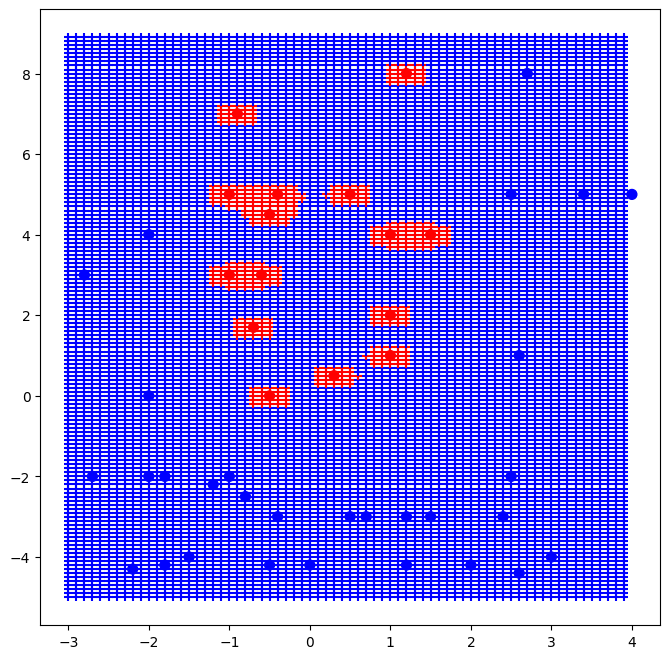

In [123]:
draw_boundary(model_svm, datatrain, -3,4,-5,9)

<font color="blue">**Todo:**</font>
- Try now to modify C and gamma to have a better decision boundary
- Choose the best values of C and gamma 
- Estimate the generalization error of this SVM
- draw the boundaries

In [133]:
# TODO - search for best C and gamma values using validation set

result = (0,0,None)

for C in np.geomspace(0.01,1000,6):
    for G in np.geomspace(0.01,1000,6):
        model_svm = svm.SVC(C = C, kernel = 'rbf', gamma=G)
        model_svm.fit(datatrain.iloc[:,0:2], datatrain.y)

        s1 = model_svm.score(datatrain.iloc[:,0:2], datatrain.y)
        s2 = model_svm.score(datavalid.iloc[:,0:2], datavalid.y)

        if s2 > result[0]:
            result = (s2,s1,model_svm)
        elif s2 == result[0] and s1 > result[1]:
            result = (s2,s1,model_svm)
        
print(result)

(0.9807692307692307, 1.0, SVC(C=np.float64(1.0), gamma=np.float64(1.0)))


In [134]:
# TODO - generalization error estimation
model_svm = result[2]

model_svm.score(datatest.iloc[:,0:2], datatest.y)

0.9811320754716981

/Users/tomchauvel/Documents/GitHub/2024-2025-ESIR-AA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


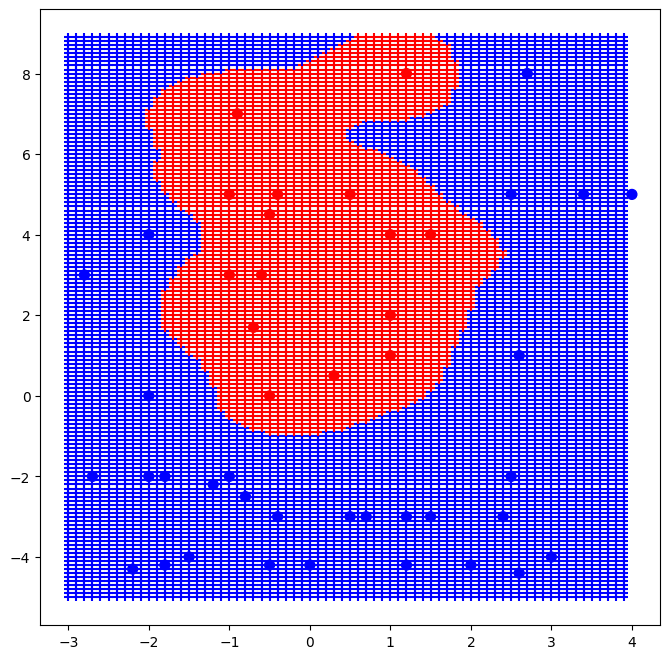

In [135]:
# TODO - draw the boundaries
draw_boundary(model_svm, datatrain, -3,4,-5,9)

<font color="blue">**Todo:**</font> You can also try polynomial kernels by specifying <code>kernel = 'poly'</code>. You'll have to tune the parameter <code>'degree'</code> with this kernel.

Note that in SVC, polynomial kernel is defined as: $$ K(x,x')=(\gamma (x.x') + r)^d$$ where $d$ is specified by parameter <code>degree</code>, r by <code>coef0</code> (default=0.0).

In [154]:
# TODO - Fit a polynomial kernel. Find the best C and degree using validation set

result = (0,0,None)

for C in np.geomspace(0.01,10000,7):
    for D in range(1,10):
        model_svm = svm.SVC(C = C, kernel = 'poly', degree=D)
        model_svm.fit(datatrain.iloc[:,0:2], datatrain.y)

        s1 = model_svm.score(datatrain.iloc[:,0:2], datatrain.y)
        s2 = model_svm.score(datavalid.iloc[:,0:2], datavalid.y)

        if s2 > result[0]:
            result = (s2,s1,model_svm)
        elif s2 == result[0] and s1 > result[1]:
            result = (s2,s1,model_svm)
        
print(result)

(0.8846153846153846, 0.8222222222222222, SVC(C=np.float64(1000.0), degree=2, kernel='poly'))


In [152]:
# TODO - generalization error estimation
model_svm = result[2]

model_svm.score(datatest.iloc[:,0:2], datatest.y)

0.8679245283018868

<font color="red">**Question 4:**</font> 
- Which are finally the best hyper-parameters?
- Evaluate the final model on the test set.

Degrée 2 et  C = 1000

l'erreur est similaire aux valid et train aux alentours de 0,868

## <font color="#9400D3">4. Expert mode</font>

When tuning the hyper-parameters with a validation set, rather than using several 'for', scikit learn offers a <code>GridSearchCV(estimator, param_grid)</code> function : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

The parameters of the estimator (classifier) are optimized by **cross-validated** grid-search over a parameter grid. Candidates are exhaustively generated from a grid of parameter values specified with the <code>param_grid</code> parameter.

In [ ]:
param_grid = [
              {'C': [1, 10, 100, 1000], 'kernel': ['linear']}, # 4
              {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4], 'kernel': ['poly']}, # 12
              {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1.0], 'kernel': ['rbf']}, # 12
              ]
print("\n # Tuning hyper-parameters")
clf = GridSearchCV(svm.SVC(), param_grid, cv=5) # 5 plis
clf.fit(datatrain.iloc[:,:2], datatrain.y)


print("Best parameters set found on training set:")
print(clf.best_params_)

y_pred = clf.predict(datatest.iloc[:,:2])
print("\n SVM on test set (parameter tuning) : \t", accuracy_score(datatest.y, y_pred), "\n")



 # Tuning hyper-parameters
Best parameters set found on training set:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

 SVM on test set (parameter tuning) : 	 1.0 



<font color="red">**Question 5:**</font> 
- Explain how many learning are done in the above procedure.
- How the (hyper)-parameter are selected?
- Does that match your previous study?

(4 + 12 + 12) x 5 = 28 x 5 = 140 tests

il divise notre ensemble de train en 5 plis. Il test chacune des combinaisons dans param_grid sur ces plis. il prend celui qui a la meilleure accuracy.

non, parce que je faisais sur tout l'ensemble de train